/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


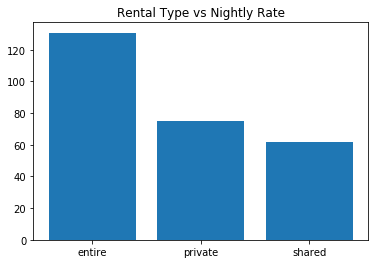

In [2]:
# megha smells
import matplotlib.pyplot as plt
import pandas
import folium
import numpy as np
from sklearn import linear_model
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

data = pandas.read_csv("AB_NYC_2019.csv")
data = data[data["price"]>30]
data = data[data["price"]<200]
data = data.dropna()
data.columns


# 3. Room Type vs Price
data_by_roomtype = data.sort_values(["room_type"])
room_types = data_by_roomtype["room_type"].unique()


sums = {"entire": 0, "private": 0, "shared": 0}
tally = {"entire": 0, "private": 0, "shared": 0}
averages = {}

def generate_bar_plot(row):
    global sums, tally
    if(row["room_type"]=="Entire home/apt"):
        sums["entire"]+=row["price"]
        tally["entire"]+=1
    elif(row["room_type"]=="Private room"):
        sums["private"]+=row["price"]
        tally["private"]+=1
    elif(row["room_type"] == "Shared room"):
        sums["shared"]+=row["price"]
        tally["shared"]+=1

data_by_roomtype.apply(generate_bar_plot, axis=1)

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())

plt.title("Rental Type vs Nightly Rate")

from folium import plugins

map_hooray = folium.Map(location=[40.7, -73.9],
                    zoom_start = 10) 

df_acc = data 
# Ensure you're handing it floats
df_acc['latitude'] = df_acc['latitude'].astype(float)
df_acc['longitude'] = df_acc['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[df_acc['reviews_per_month']>5] # Reducing data size so it runs faster# Reducing data size so it runs faster
heat_df = heat_df[['latitude', 'longitude', 'price']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'price'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df["price"]>20*i][heat_df["price"]<20*(i+1)].iterrows()] for i in range(0, 50)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.7)
hm.add_to(map_hooray)
# Display the map
map_hooray

# heat_df

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314


# Megha smells really bad

In [4]:
# Means, Medians, and Standard Deviations

# Price

print("---------------Price-------------")
print("Mean: " + str(np.mean(data["price"])))
print("Median: " + str(np.median(data["price"])))
print("Standard Deviation: " + str(np.std(data["price"])))
print()
print("---------------Number of Reviews per Month-------------")
print("Mean: " + str(np.mean(data["reviews_per_month"])))
print("Median: " + str(np.median(data["reviews_per_month"])))
print("Standard Deviation: " + str(np.std(data["reviews_per_month"])))
print()
print("---------------Number of Reviews-------------")
print("Mean: " + str(np.mean(data["number_of_reviews"])))
print("Median: " + str(np.median(data["number_of_reviews"])))
print("Standard Deviation: " + str(np.std(data["number_of_reviews"])))
print()
print("---------------Availability-------------")
print("Mean: " + str(np.mean(data["availability_365"])))
print("Median: " + str(np.median(data["availability_365"])))
print("Standard Deviation: " + str(np.std(data["availability_365"])))

# Reviews per Month

---------------Price-------------
Mean: 99.51595643034588
Median: 92.0
Standard Deviation: 43.5842893326983

---------------Number of Reviews per Month-------------
Mean: 1.3974737244410471
Median: 0.72
Standard Deviation: 1.7251433380389394

---------------Number of Reviews-------------
Mean: 30.813905344289445
Median: 10.0
Standard Deviation: 50.19300403082111

---------------Availability-------------
Mean: 109.29963691954902
Median: 46.0
Standard Deviation: 127.7175038177877


In [5]:
neighbourhood_averages = {}

for row in data.iterrows():
    if row[1][5] in neighbourhood_averages:
        neighbourhood_averages[row[1][5]][0]+=1
        neighbourhood_averages[row[1][5]][1]+=row[1][9]
    else:
        neighbourhood_averages[row[1][5]] = [1, row[1][9]]

In [6]:
manhattan_mean = data[data["neighbourhood_group"]=="Manhattan"].price.mean()
brooklyn_mean = data[data["neighbourhood_group"]=="Brooklyn"].price.mean()
queens_mean = data[data["neighbourhood_group"]=="Queens"].price.mean()
staten_mean = data[data["neighbourhood_group"]=="Staten Island"].price.mean()
bronx_mean = data[data["neighbourhood_group"]=="Bronx"].price.mean()

In [7]:
def replace_neighbourhood(n):
    if(n == "Manhattan"): 
        return manhattan_mean
    elif(n == "Brooklyn"): 
        return brooklyn_mean
    elif(n == "Queens"): 
        return queens_mean
    elif(n == "Staten Island"): 
        return staten_mean
    elif(n == "Bronx"): 
        return bronx_mean
    
def replace_type(t):
    if(t == "Entire home/apt"):
        return averages["entire"]
    elif(t == "Private room"):
        return averages["private"]
    elif(t == "Shared room"):
        return averages["shared"]

In [8]:
pre = data.drop(['id', 'name', 'host_id', 'host_name',
       'minimum_nights', 'last_review' , 'calculated_host_listings_count',
       'availability_365'], axis=1)
pre.neighbourhood_group = pre["neighbourhood_group"].apply(replace_neighbourhood)
pre.room_type = pre["room_type"].apply(replace_type)

In [9]:
pre

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,93.900775,Kensington,40.64749,-73.97237,75.194426,149,9,0.21
3,93.900775,Clinton Hill,40.68514,-73.95976,130.715395,89,270,4.64
4,114.885865,East Harlem,40.79851,-73.94399,130.715395,80,9,0.10
6,93.900775,Bedford-Stuyvesant,40.68688,-73.95596,75.194426,60,49,0.40
7,114.885865,Hell's Kitchen,40.76489,-73.98493,75.194426,79,430,3.47
8,114.885865,Upper West Side,40.80178,-73.96723,75.194426,79,118,0.99
9,114.885865,Chinatown,40.71344,-73.99037,130.715395,150,160,1.33
10,114.885865,Upper West Side,40.80316,-73.96545,130.715395,135,53,0.43
11,114.885865,Hell's Kitchen,40.76076,-73.98867,75.194426,85,188,1.50
12,93.900775,South Slope,40.66829,-73.98779,75.194426,89,167,1.34


In [10]:
neighbourhood_averages2 = {}
for k in neighbourhood_averages:
    neighbourhood_averages2[k] = neighbourhood_averages[k][1]/neighbourhood_averages[k][0]

In [11]:
pre

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,93.900775,Kensington,40.64749,-73.97237,75.194426,149,9,0.21
3,93.900775,Clinton Hill,40.68514,-73.95976,130.715395,89,270,4.64
4,114.885865,East Harlem,40.79851,-73.94399,130.715395,80,9,0.10
6,93.900775,Bedford-Stuyvesant,40.68688,-73.95596,75.194426,60,49,0.40
7,114.885865,Hell's Kitchen,40.76489,-73.98493,75.194426,79,430,3.47
8,114.885865,Upper West Side,40.80178,-73.96723,75.194426,79,118,0.99
9,114.885865,Chinatown,40.71344,-73.99037,130.715395,150,160,1.33
10,114.885865,Upper West Side,40.80316,-73.96545,130.715395,135,53,0.43
11,114.885865,Hell's Kitchen,40.76076,-73.98867,75.194426,85,188,1.50
12,93.900775,South Slope,40.66829,-73.98779,75.194426,89,167,1.34


In [12]:
def neighbourhood_change(n):
    global neighbourhood_averages2
    return neighbourhood_averages2[n]

pre.neighbourhood = pre["neighbourhood"].apply(neighbourhood_change)

In [13]:
reg = linear_model.LinearRegression()
reg.fit(pre[['neighbourhood_group', 'neighbourhood', 'room_type', 'reviews_per_month', 'latitude', 'longitude']], data.price)

a = reg.coef_
i = reg.intercept_

print(a)
print(i)

[  0.09806508   0.72170307   0.90379332   0.83001029  19.69861235
 -10.50234746]
-1652.056272689203


In [14]:
test = [153.814, 150.714, 151.64, 9, 40.64748, -73.97237]

In [15]:
np.dot(test, a)-i

3498.014606662703

In [16]:
pre

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,93.900775,71.984000,40.64749,-73.97237,75.194426,149,9,0.21
3,93.900775,108.661499,40.68514,-73.95976,130.715395,89,270,4.64
4,114.885865,99.324063,40.79851,-73.94399,130.715395,80,9,0.10
6,93.900775,88.739951,40.68688,-73.95596,75.194426,60,49,0.40
7,114.885865,126.327916,40.76489,-73.98493,75.194426,79,430,3.47
8,114.885865,119.723562,40.80178,-73.96723,75.194426,79,118,0.99
9,114.885865,117.161417,40.71344,-73.99037,130.715395,150,160,1.33
10,114.885865,119.723562,40.80316,-73.96545,130.715395,135,53,0.43
11,114.885865,126.327916,40.76076,-73.98867,75.194426,85,188,1.50
12,93.900775,119.753695,40.66829,-73.98779,75.194426,89,167,1.34


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

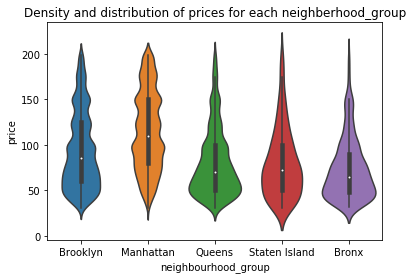

In [17]:
violin = sns.violinplot(data=data, x='neighbourhood_group', y='price')
violin.set_title('Density and distribution of prices for each neighberhood_group')